In [30]:
import pandas as pd
import warnings
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [31]:
df_industries = pd.read_excel('/Users/ju/Projects/00_SMU/mqf_practice/QF600_Asset_Pricing/Exam/data/Exam-Industry.xlsx', index_col='Date')
df_market = pd.read_excel('/Users/ju/Projects/00_SMU/mqf_practice/QF600_Asset_Pricing/Exam/data/Exam–Market.xlsx', index_col='Date')
df = pd.merge(df_industries, df_market, left_index=True, right_index=True)
# df_risk_factors = pd.read_excel('./data/Risk_Factors.xlsx', index_col='Date')

The data files that you received contain monthly excess returns for five industry portfolios and the market portfolio. Using monthly excess returns for the five industry portfolios and the market portfolio:

Calculate and report the risk premiums and β coefficients for the five industry portfolios.

In [32]:
monthly_mean_return = pd.concat([df_industries.mean(),
                                 df_market.mean()])

mean_return_df = pd.DataFrame({
    'Mean Return (%)': monthly_mean_return
    })
pd.DataFrame(mean_return_df.round(3))

,Mean Return (%)
Cnsmr,1.449
Manuf,1.109
HiTec,1.672
Hlth,1.452
Other,1.366
Market,1.395


In [33]:
R_f = 0

excess_industries_return = df_industries.values - R_f
excess_market_return = df_market.values - R_f

model = LinearRegression()
model.fit(excess_market_return, excess_industries_return)

# Get the coefficients and intercept
coefficients = model.coef_.flatten()  # flatten so it is one element
intercept = model.intercept_

In [34]:
mm_df = pd.DataFrame({
    'Intercept (Alpha_i)': intercept,
    'Slope (Beta_i)' : coefficients
    }, index=df_industries.columns)

print("\nComputed Alpha and Beta for 5 Industries:")
pd.DataFrame(mm_df.round(4))


Computed Alpha and Beta for 5 Industries:


,Intercept (Alpha_i),Slope (Beta_i)
Cnsmr,0.3283,0.8034
Manuf,-0.3471,1.0436
HiTec,0.2446,1.0234
Hlth,0.3843,0.7653
Other,-0.2346,1.1475


Estimate the intercept and slope coefficients for the security market line (SML), and plot the SML with risk premium on the vertical axis and β on the horizontal axis. This plot must cover the range from β = 0 to 1.6 on the horizontal axis.



In [35]:
betas = pd.concat([mm_df['Slope (Beta_i)'], pd.Series({'Market': 1})])  # add market
betas_reshaped = betas.values.reshape(-1, 1)

# Reshape monthly_mean_return if needed (usually it stays 1D)
monthly_mean_return_reshaped = monthly_mean_return.values.reshape(-1)
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(betas_reshaped, monthly_mean_return_reshaped)


print(f"SML coefficient {model.coef_[0]:.5f} and intercept respectively {model.intercept_:.5f}")

SML coefficient -0.28676 and intercept respectively 1.68374


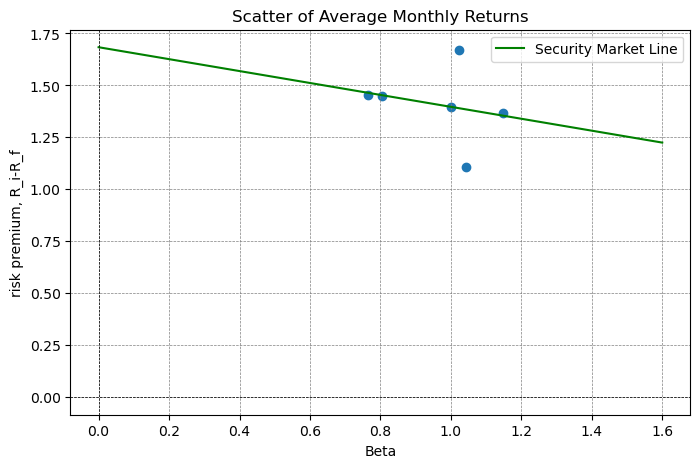

In [36]:
x = np.linspace(0, 1.6, 200)
y = model.coef_[0] * x + model.intercept_

# Plotting
plt.figure(figsize=(8, 5))
plt.title('Scatter of Average Monthly Returns')
plt.plot(x, y, label=f'Security Market Line', color='Green')
plt.xlabel('Beta')
plt.ylabel('risk premium, R_i-R_f')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.scatter(betas,monthly_mean_return)
plt.legend()
plt.show()

Also plot the positions of the five industry portfolios and the market portfolio, on the same graph as the SML.

Briefly explain (in words) the economic interpretation for the intercept and slope coefficients of the SML.

---

answer: \

- Intercept coefficient from market model regression shows pricing errorbased on CAPM: α > 0 (or α < 0) ⇒ asset has outperformed (orunderperformed) market portfolio on risk-adjusted basis
- Slope coefficient from market model regression shows level of exposure tomarket risk: β > 1 (or β < 1) ⇒ more (or less) exposure to market risk thanmarket portfolio
- SML shows that all appropriately-priced assets have same Treynor ratio ⇒
assets that lie above (or below) SML are underpriced (or overpriced)
